### Задание
Домашнее задание к лекции «Задачи классификации и кластеризации»  

Задание.  

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
Разделите данные на выборку для обучения и тестирования  
Постройте модель LDA  
Визуализируйте предсказания для тестовой выборки и центры классов  
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию  



In [1]:
from sklearn.datasets import load_iris # Датасет сорта Ириса
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
type(iris) # Тип объекта датасета Bunch  - похож на словарь 

sklearn.utils.Bunch

In [7]:
# Загружаем данные в датафрейм
df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df = df[['sepal length (cm)', 'sepal width (cm)']] # Оставяем только два признака
variety = iris.target # Целевая переменная - сорт Ириса 
df['variety'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
51,6.4,3.2,4.5,1.5,1
96,5.7,2.9,4.2,1.3,1
53,5.5,2.3,4.0,1.3,1
86,6.7,3.1,4.7,1.5,1
136,6.3,3.4,5.6,2.4,2


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [141]:
# Разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df, variety, test_size=0.20)

In [142]:
# Просто для просмотра отобранных данных 
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     sepal length (cm)  sepal width (cm)
42                 4.4               3.2
82                 5.8               2.7
86                 6.7               3.1
105                7.6               3.0
91                 6.1               3.0
..                 ...               ...
31                 5.4               3.4
28                 5.2               3.4
3                  4.6               3.1
67                 5.8               2.7
63                 6.1               2.9

[120 rows x 2 columns]
     sepal length (cm)  sepal width (cm)
61                 5.9               3.0
145                6.7               3.0
107                7.3               2.9
9                  4.9               3.1
25                 5.0               3.0
140                6.7               3.1
65                 6.7               3.1
148                6.2               3.4
111                6.4               2.7
114                5.8               2.8
58                 6.6           

In [143]:
# Импорт LDA  функционала
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [144]:
lda = LinearDiscriminantAnalysis()

In [145]:
# Обучаем наши данные 
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [146]:
# Выводим результат прогноза 
lda.predict(X_test)

array([1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 0, 1])

In [147]:
# 3й столбец разница для наглядного поиска 
result = pd.DataFrame([y_test, lda.predict(X_test), (y_test - lda.predict(X_test))]).T
result

,0,1,2
0,1,1,0
1,2,2,0
2,2,2,0
3,0,0,0
4,0,0,0
5,2,2,0
6,1,2,-1
7,2,1,1
8,2,2,0
9,2,1,1


Модель ошиблась несколько раз 

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(y_test, lda.predict(X_test))

0.7

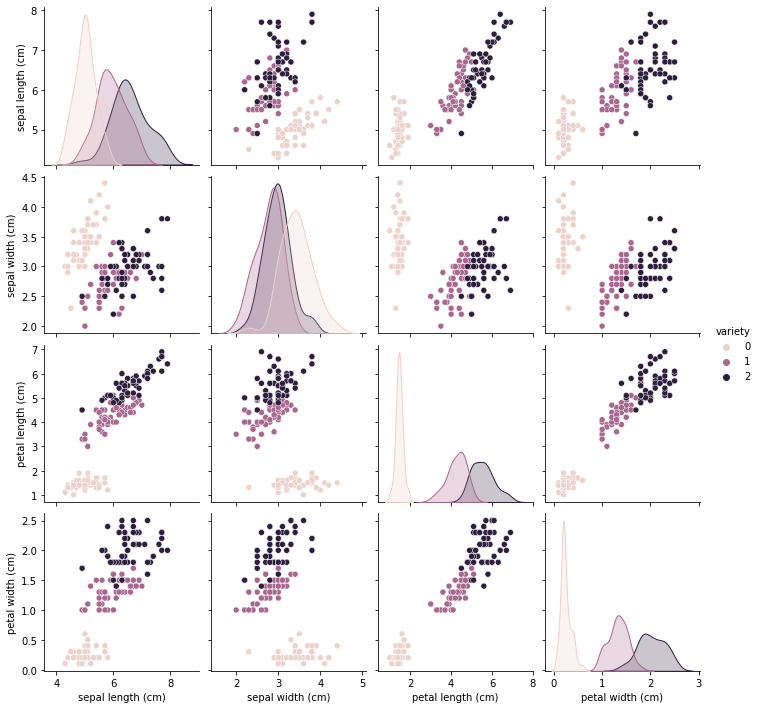

In [210]:
import seaborn as sns
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)', 'variety']], hue = 'variety')

Делаем вывод , что выбранные признаки в отдельности плохо подходят для классификации данной выборки. т.к. точки классов перемешаны между собой . 

In [207]:
# Находим координаты центроидов 
lda.means_

array([[5.01590909, 3.42727273],
       [5.845     , 2.7325    ],
       [6.54444444, 2.98333333]])

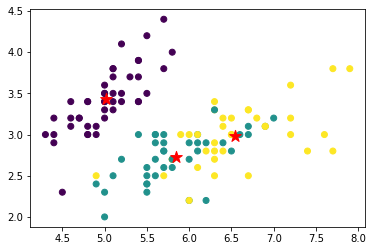

In [209]:
# Визуализируем 
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# Визуализайия центроидов
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

### Кластеризация

In [212]:
# Загружаем данные в датафрейм
df_1= pd.DataFrame(iris.data)
iris_df_1 = df[['sepal length (cm)', 'sepal width (cm)']]

In [213]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [215]:
# fit-transform сразу обучается и преобразует данные
iris_scaled = scaler.fit_transform(iris_df_1)


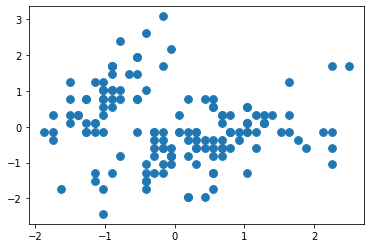

In [216]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='autumn', s=60)

In [159]:
from sklearn.cluster import KMeans

In [176]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 8)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

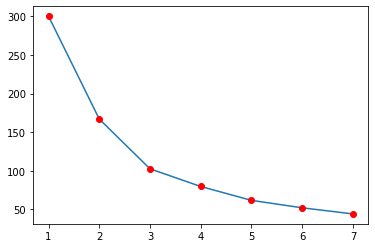

In [177]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

На основании грайика "локтя" для кластеризации можно выбрать 4 кластера

In [217]:
# Указываем количество кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(iris_scaled)
clusters

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 0, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3])

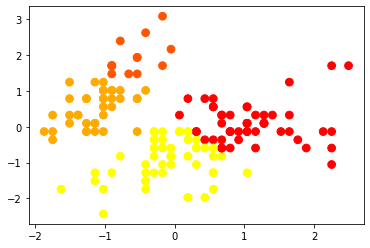

In [218]:
# Визуализируем с по выранному кол-ву кластеров.
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], cmap='autumn', c=clusters, s=60)